# Machine Learning and Statistics

## Student: Hans Pérez Rubín de Celis

## Student ID number: G00387884

## Instructions

In this project you must create a web service that uses machine learning to make predictions based on the data set ``powerproduction`` available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:

**1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.**

**2. Python script that runs a web service based on the model, as above.**

**3. Dockerfile to build and run the web service in a container.**

**4. Standard items in a git repository such as a README.**

To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

![imagen eolica](https://i.blogs.es/77499c/eolica/1024_2000.jpg)

## Introduction.

The question that many are asking is: how can data science revolutionize and improve the sustainability of our environment? One way is to use big data analytics and machine learning. Fortunately, there has been a great increase and advance in algorithms, sensors, Internet of Things (IoT) devices, and data mining techniques, yielding the following benefits:

Reliability - By analyzing data usage patterns, it is possible to improve maintenance, efficiency, and extend the life of solar panels.
Forecast: by allowing the development of algorithms, it is possible to predict changes in solar and wind conditions.

There are many benefits that computing provides, all with the aim of making improvements for the sustainability of our environment in the future

Big data for the management of solar and wind energy has been a particularly active field of research. The main problem with this type of energy is when the natural resources are not optimal, because they do not produce enough energy. During these times, the deficit must be covered with gas, coal or nuclear energy.

By collecting information on usage and combining it with other sensory information, data analysis and computational modeling can calculate the ups and downs of energy use and when there is a surplus.

The growing need to extract value and knowledge from data is allowing the technology industry to make great strides in fields such as artificial intelligence, Big data or real-time analytics, but it is also contributing to the development of the technologies that give them life , a whole new generation of software essential for understanding data in order to be able to glimpse the decisions to be made.

![imagen energias alternativas](https://www.worldenergytrade.com/images/stories/news/technical_articles/energias_alternativas/5094/El-analisis-de-datos-en-el-sector-petrolero-logistica-minero-y-energias-alternativas-5094.jpg)


First we are going to download a data set powerproduction.csv.

We have to develop a model that makes predictions of wind energy Y based on the input of wind speed X.

## How do wind turbines work?

Simply put, a wind turbine works the opposite of a fan. Instead of using electricity to make wind, like a fan, wind turbines use wind to produce electricity. The wind turns the blades, which turn a shaft, which connects to a generator and makes electricity.

![imagen energia eolica](http://www.sectorelectricidad.com/wp-content/uploads/2017/04/Las-turbinas-de-viento.jpg)

Wind turbines operate on a simple principle. The energy in the wind turns two or three propellers-like blades around a rotor. The rotor is connected to the main shaft, which turns a generator to create electricity. 

![imagen grafico](https://media2.giphy.com/media/69ocWMbdaT85eIEva1/giphy.gif)

## Linear regression algorithm.

Let us remember that Supervised Machine Learning algorithms learn by themselves and -in this case- to automatically obtain that "line" that we are looking for with the prediction trend. To do this, the error is measured with respect to the input points and the actual output “Y” value. The algorithm should minimize the cost of a quadratic error function and those coefficients will correspond to the optimal line. There are several methods to minimize the cost. The most common is to use a vector version and the so-called Normal Equation that will give us a direct result.

In [22]:
# Data:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
n = len(x)
x = np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sumx/n
promy = sumy/n

In [25]:
m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b = promy - m*promx
m , b

(1.0, 0.0)

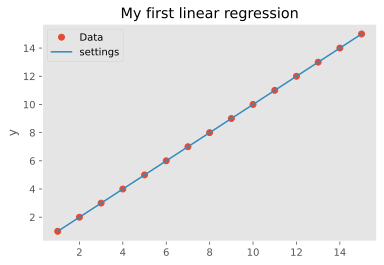

In [26]:
plt.plot(x,y,'o', label='Data')
plt.plot(x, m*x + b, label='settings')
plt.ylabel('x')
plt.ylabel('y')
plt.title('My first linear regression')
plt.grid()
plt.legend()
plt.show()

## Developing the linear regression of POWERPRODUCTION.CSV

Let's start by importing the libraries that we will use:

In [27]:
# Required Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

We read the csv file and load it as a Pandas dataset. And we see its size

In [28]:
# we load the input data
data = pd.read_csv("powerproduction.csv")
# let's see how many dimensions and records it contains
data.shape

(500, 2)

In [29]:
## is 500 records with 2 columns. Let's see the first records
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [30]:
# Now let's see some statistics of our data
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Now we are going to generate related variables

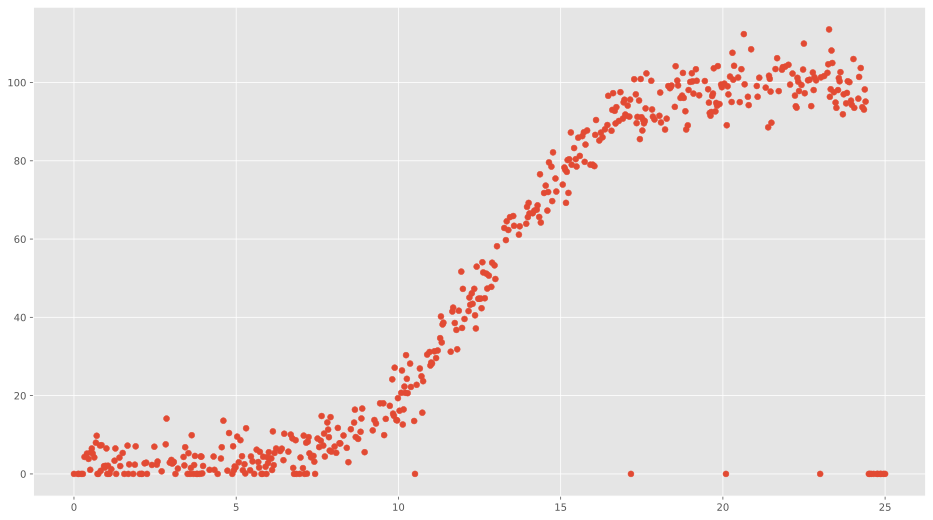

In [31]:
from matplotlib import pyplot as plt
import pandas as pd
powerproduction = pd.read_csv('powerproduction.csv')
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
plt.scatter(data1, data2)
plt.show()

## Development of our simple linear regression

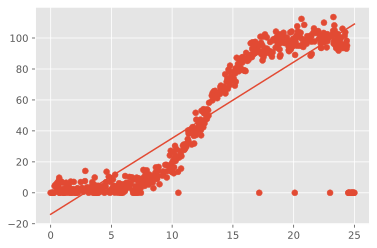

In [34]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

powerproduction = pd.read_csv('powerproduction.csv')

x = powerproduction['speed'].tolist()
y = powerproduction['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

![Image](predictions.png)

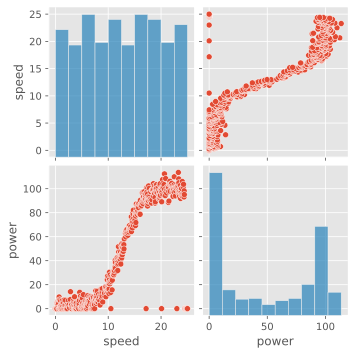

In [35]:
# Dr. Ian McLoughlin's demo of sklearn.linear_model and his demonstration of seaborn served as an example.
import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
sns.pairplot(powerproduction)

In [36]:
def f(x, p):
    return p[0] + x * p[1]

In [7]:
import seaborn as sns

powerproduction = pd.read_csv('powerproduction.csv')

poweranalysis = powerproduction[["speed", "power"]].dropna() sns.regplot(x="speed", y="power", data=powerproduction)

SyntaxError: invalid syntax (<ipython-input-7-ca5bdd319140>, line 5)


**This Project can be found in detail in the file Project 52954.ipynb**


## Bibliographic references

#### [Python Machine Learning - Second Edition](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=nlebk&AN=1606531&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_9)
Author:Raschka, Sebastian, Mirjalili, Vahid

![book1](https://user-images.githubusercontent.com/60121637/82153453-66aab500-985f-11ea-881a-fd5e2bbd3c8e.png)

#### [Mastering Social Media Mining with Python](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1295360&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_32)
Author: Bonzanini, Marco

![book2](https://user-images.githubusercontent.com/60121637/82153488-a40f4280-985f-11ea-9b14-a7f0f4cf5d67.png)
#### [Python Data Science Essentials - Second Edition](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1409191&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_Cover)
Author: Boschetti, Alberto, Massaron, Luca

![book3](https://user-images.githubusercontent.com/60121637/82153641-a756fe00-9860-11ea-8245-e15e478f1450.png)

## Other references

[DeepMind recurre al machine learning para mejorar la eficiencia de los parques eólicos y optimizar la gestión de energía limpia](https://www.xataka.com/inteligencia-artificial/deepmind-recurre-al-machine-learning-para-mejorar-eficiencia-parques-eolicos-optimizar-gestion-energia-limpia)

[Beneficios del análisis de datos para la energía renovable](https://www.worldenergytrade.com/energias-alternativas/investigacion/beneficios-del-analisis-de-datos-para-la-energia-renovable)

[El análisis de datos en el sector petrolero, logística, minero y energías alternativas](https://www.worldenergytrade.com/articulos-tecnicos/energias-alternativas-at/el-analisis-de-datos-en-el-sector-petrolero-logistica-minero-y-energias-alternativas)

[Energy 101: Wind Power](https://youtu.be/EYYHfMCw-FI)

[Machine learning techniques in the diagnosis of wind turbines
](https://www.ecorfan.org/republicofperu/research_journals/Revista_de_Energias_Renovables/vol3num11/Revista_de_Energ%C3%ADas_Renovables_V3_N11_2.pdf)